In [475]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from scipy import interpolate
from operator import itemgetter
import matplotlib as mpl
from astropy.stats import sigma_clip

plt.style.use('seaborn-white')
mpl.rcParams.update({'font.size': 16})

# Finding the Optimal Lowercut Value (TAME parameter) per Line
The lowercut value appears to be key to TAME assigning a good equivalent width measurement for a given line. This notebook uses measurements taken from ~20 stars at 10 different lowercut values to find the best lowercut value per line. Note that a lowercut value seems to be a SNR dependent parameter, so it might not be as simple as just finding a universal value per line.

In [509]:
# Take a look at one cluster

#All Files
outputs = glob.glob("tame-1.1.0/*14.json")
by_hand = glob.glob("tame-1.1.0/*.ew")

#Fine Sampling
#outputs = glob.glob("tame-1.1.0/finesampling.json")
#by_hand = glob.glob("tame-1.1.0/col110_5125*.ew")


d = {'JSON File': outputs, 'By-Hand File': by_hand}
disp_df = pd.DataFrame(data=d)
disp_df


,By-Hand File,JSON File
0,tame-1.1.0/col110_1134red_oned_25jan14.ew,tame-1.1.0/col110_1134red_oned_25jan14.json
1,tame-1.1.0/col110_2119red_oned_26jan14.ew,tame-1.1.0/col110_2119red_oned_26jan14.json
2,tame-1.1.0/col110_2129red_oned_25jan14.ew,tame-1.1.0/col110_2129red_oned_25jan14.json
3,tame-1.1.0/col110_2223red_oned_26jan14.ew,tame-1.1.0/col110_2223red_oned_26jan14.json
4,tame-1.1.0/col110_3122red_oned_mar2014.ew,tame-1.1.0/col110_3122red_oned_mar2014.json
5,tame-1.1.0/col110_3144red_oned_mar2014.ew,tame-1.1.0/col110_3144red_oned_mar2014.json
6,tame-1.1.0/col110_3244red_oned_25jan14.ew,tame-1.1.0/col110_3244red_oned_25jan14.json
7,tame-1.1.0/col110_4260red_oned_26jan14.ew,tame-1.1.0/col110_4260red_oned_26jan14.json
8,tame-1.1.0/col110_5125red_oned_26jan14.ew,tame-1.1.0/col110_5125red_oned_26jan14.json
9,tame-1.1.0/ngc2204_1124red_oned_05jan14.ew,tame-1.1.0/ngc2204_1124red_oned_05jan14.json


In [510]:
for i in range(len(outputs)):
    with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
        jsondata = json.load(jsonfile)
        handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
        hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
        key = list(jsondata.keys())[3]
        lowercut = [cut for cut,ew in jsondata[key]]
        #print(outputs[i],len(lowercut),'6609.11' in jsondata.keys())

### Finding Optimal Lowcut Value for each Line: Individual Solutions Method

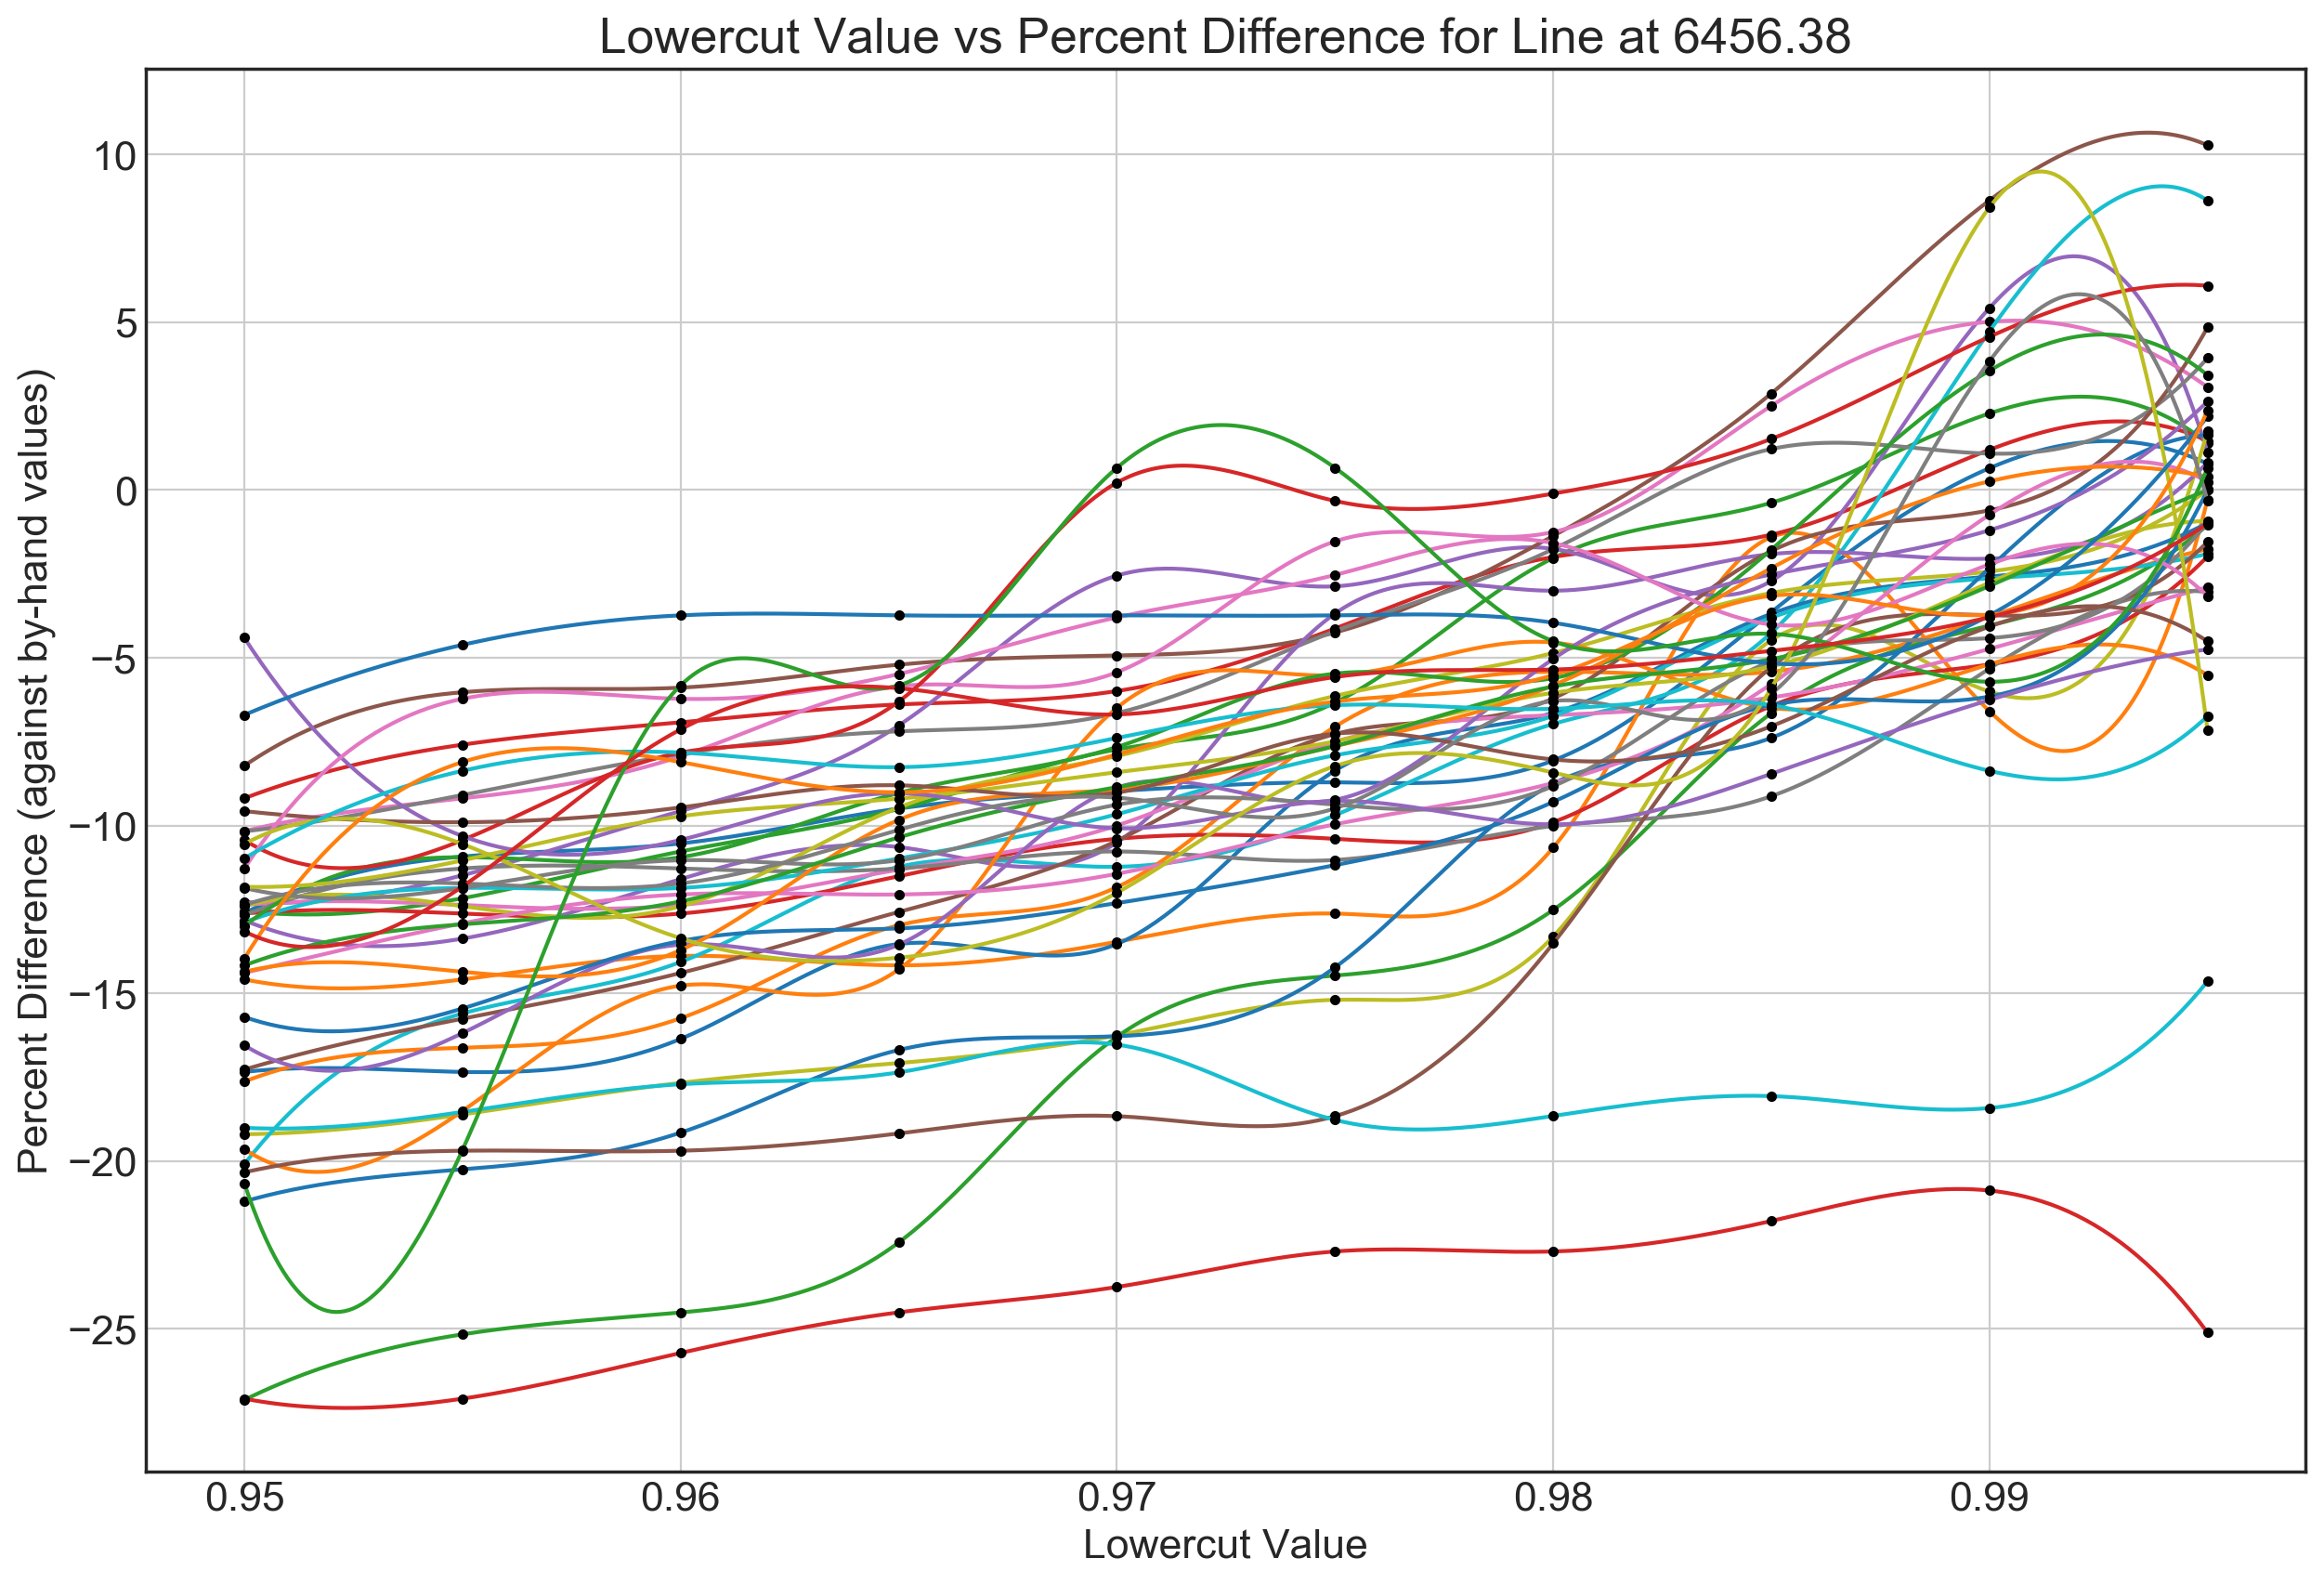

In [512]:
# Find optimal lowercut value

plt.figure(figsize=(15,10),dpi=200)

text_out = False
for i in range(len(outputs)):
    with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
        jsondata = json.load(jsonfile)
        handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
        hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
        key = list(jsondata.keys())[2]
        #key = '6180.2'
        lowercut = [cut for cut,ew in jsondata[key]]
        ew_meas = [ew for cut,ew in jsondata[key]]
        
        label = disp_df['JSON File'][i].split('/')[-1].split('.')[0]
        if text_out:
            print("=========")
            print(label)
        if hand_dict[key] == 0:
            if text_out:
                print("SKIPPED STAR: By-Hand Value of 0")
            continue
        if len(lowercut) < 5:
            if text_out:
                print("SKIPPED STAR: Not enough lowercut values")
            continue
        ew_pdiff = ((np.array(ew_meas)-hand_dict[key])/hand_dict[key]) * 100
        
        lowercut_space = np.arange(0.95,0.995,0.0001)
        f = interpolate.UnivariateSpline(lowercut, ew_pdiff, s=0)
        lowcut_roots = f.roots()
        if len(lowcut_roots) == 0:
            if min(abs(ew_pdiff)) > 10:
                if text_out:
                    print("WARNING: No good value found, using closest")
            opt_lowcut = [lowercut[np.argmin(abs(ew_pdiff))]]
        else:
            opt_lowcut = lowcut_roots


        #yToFind = 0
        #yreduced = np.array(ew_pdiff) - yToFind
        #freduced = interpolate.UnivariateSpline(lowercut, yreduced, s=0)
        #opt_lowcut = freduced.roots()

        if text_out:
            print("N Solutions: {}".format(len(lowcut_roots)))
            print("Optimal Lowercut Values: {}".format(opt_lowcut))
        #print(hand_dict[key],ew_meas[0])
        
        
        plt.plot(lowercut_space, f(lowercut_space),'-',label = label)
        plt.plot(lowercut,ew_pdiff,'.',color='k')


plt.title("Lowercut Value vs Percent Difference for Line at {}".format(key))
plt.xlabel("Lowercut Value")
plt.ylabel("Percent Difference (against by-hand values)")
plt.grid()
#plt.legend()

In [608]:
# Find optimal lowercut value
mpl.rcParams.update({'font.size': 12})

with open(outputs[3]) as jsonfile:
    line_list = list(json.load(jsonfile).keys())
    line_list = np.array(sorted(np.array(line_list).astype(float))).astype(str)
fig = plt.figure(figsize=(10,80))
fig.dpi = 200
plots_per_row = 3

for idx,line in enumerate(line_list):
    ax = fig.add_subplot(int(len(line_list)/plots_per_row),plots_per_row,idx+1)
    #print(line)
    opt_lowcuts = []
    close_lowcuts = []
    n_solns = []
    
    for i in range(len(outputs)):
        if outputs[i] == 'tame-1.1.0/ngc2204_3321red_oned_05jan14.json':
            continue
        with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
            jsondata = json.load(jsonfile)
            handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
            hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
            key = line
            lowercut = [cut for cut,ew in jsondata[key]]
            ew_meas = [ew for cut,ew in jsondata[key]]
        
            label = disp_df['JSON File'][i].split('/')[-1].split('.')[0]

            if hand_dict[key] == 0:
                #print("SKIPPED STAR: By-Hand Value of 0")
                continue
            if len(lowercut) < 5:
                #print("SKIPPED STAR: Not enough lowercut values")
                continue
            ew_pdiff = ((np.array(ew_meas)-hand_dict[key])/hand_dict[key]) * 100
        
            lowercut_space = np.arange(0.95,0.995,0.0001)
            f = interpolate.UnivariateSpline(lowercut, ew_pdiff, s=0)
            lowcut_roots = f.roots()
            if len(lowcut_roots) == 0:
                if min(abs(ew_pdiff)) > 10:
                    pass
                    #print("WARNING: No good value found, using closest")
                opt_lowcut = [lowercut[np.argmin(abs(ew_pdiff))]]
            else:
                opt_lowcut = lowcut_roots

        
            #print("N Solutions: {}".format(len(lowcut_roots)))
            #print("Optimal Lowercut Values: {}".format(opt_lowcut))
            if len(lowcut_roots) == 0:
                close_lowcuts.append(opt_lowcut)
            else:
                opt_lowcuts.append(opt_lowcut)
            n_solns.append(len(lowcut_roots))
    n_solns = np.array(n_solns)
    all_cutsolns = [soln[0] for soln in (solns for solns in opt_lowcuts)]
    all_cutclose = [soln[0] for soln in (solns for solns in close_lowcuts)]
    
    bins=np.histogram(np.hstack(all_cutsolns), bins=7)[1] #designate a consistent binsize across
    ax.hist(all_cutsolns,histtype='bar',ec='black',alpha=0.7,
            color='lightblue',bins=bins, label="Solutions")
    ax.hist(all_cutclose,histtype='bar',ec='black',alpha=0.7,
            color='firebrick',bins=bins, label="No Solutions")
    
    ax.set_xlabel("Solns: None:{}, 1:{}, 2:{}, >2:{}".format(sum(n_solns == 0),
                                                                      sum(n_solns == 1),
                                                                      sum(n_solns == 2),
                                                                      sum(n_solns > 2)))
    ax.set_title(line)
    ax.set_ylabel("Frequency")
    plt.legend()


plt.tight_layout()
plt.savefig("opt_lowcut_indiv.png")
plt.close()

mpl.rcParams.update({'font.size': 16})

### Finding Optimal Lowcut Value for each Line: Mean Solutions Method

Optimal Lowcut:  []
Standard Deviation of Percent Difference at Lowcut:  []


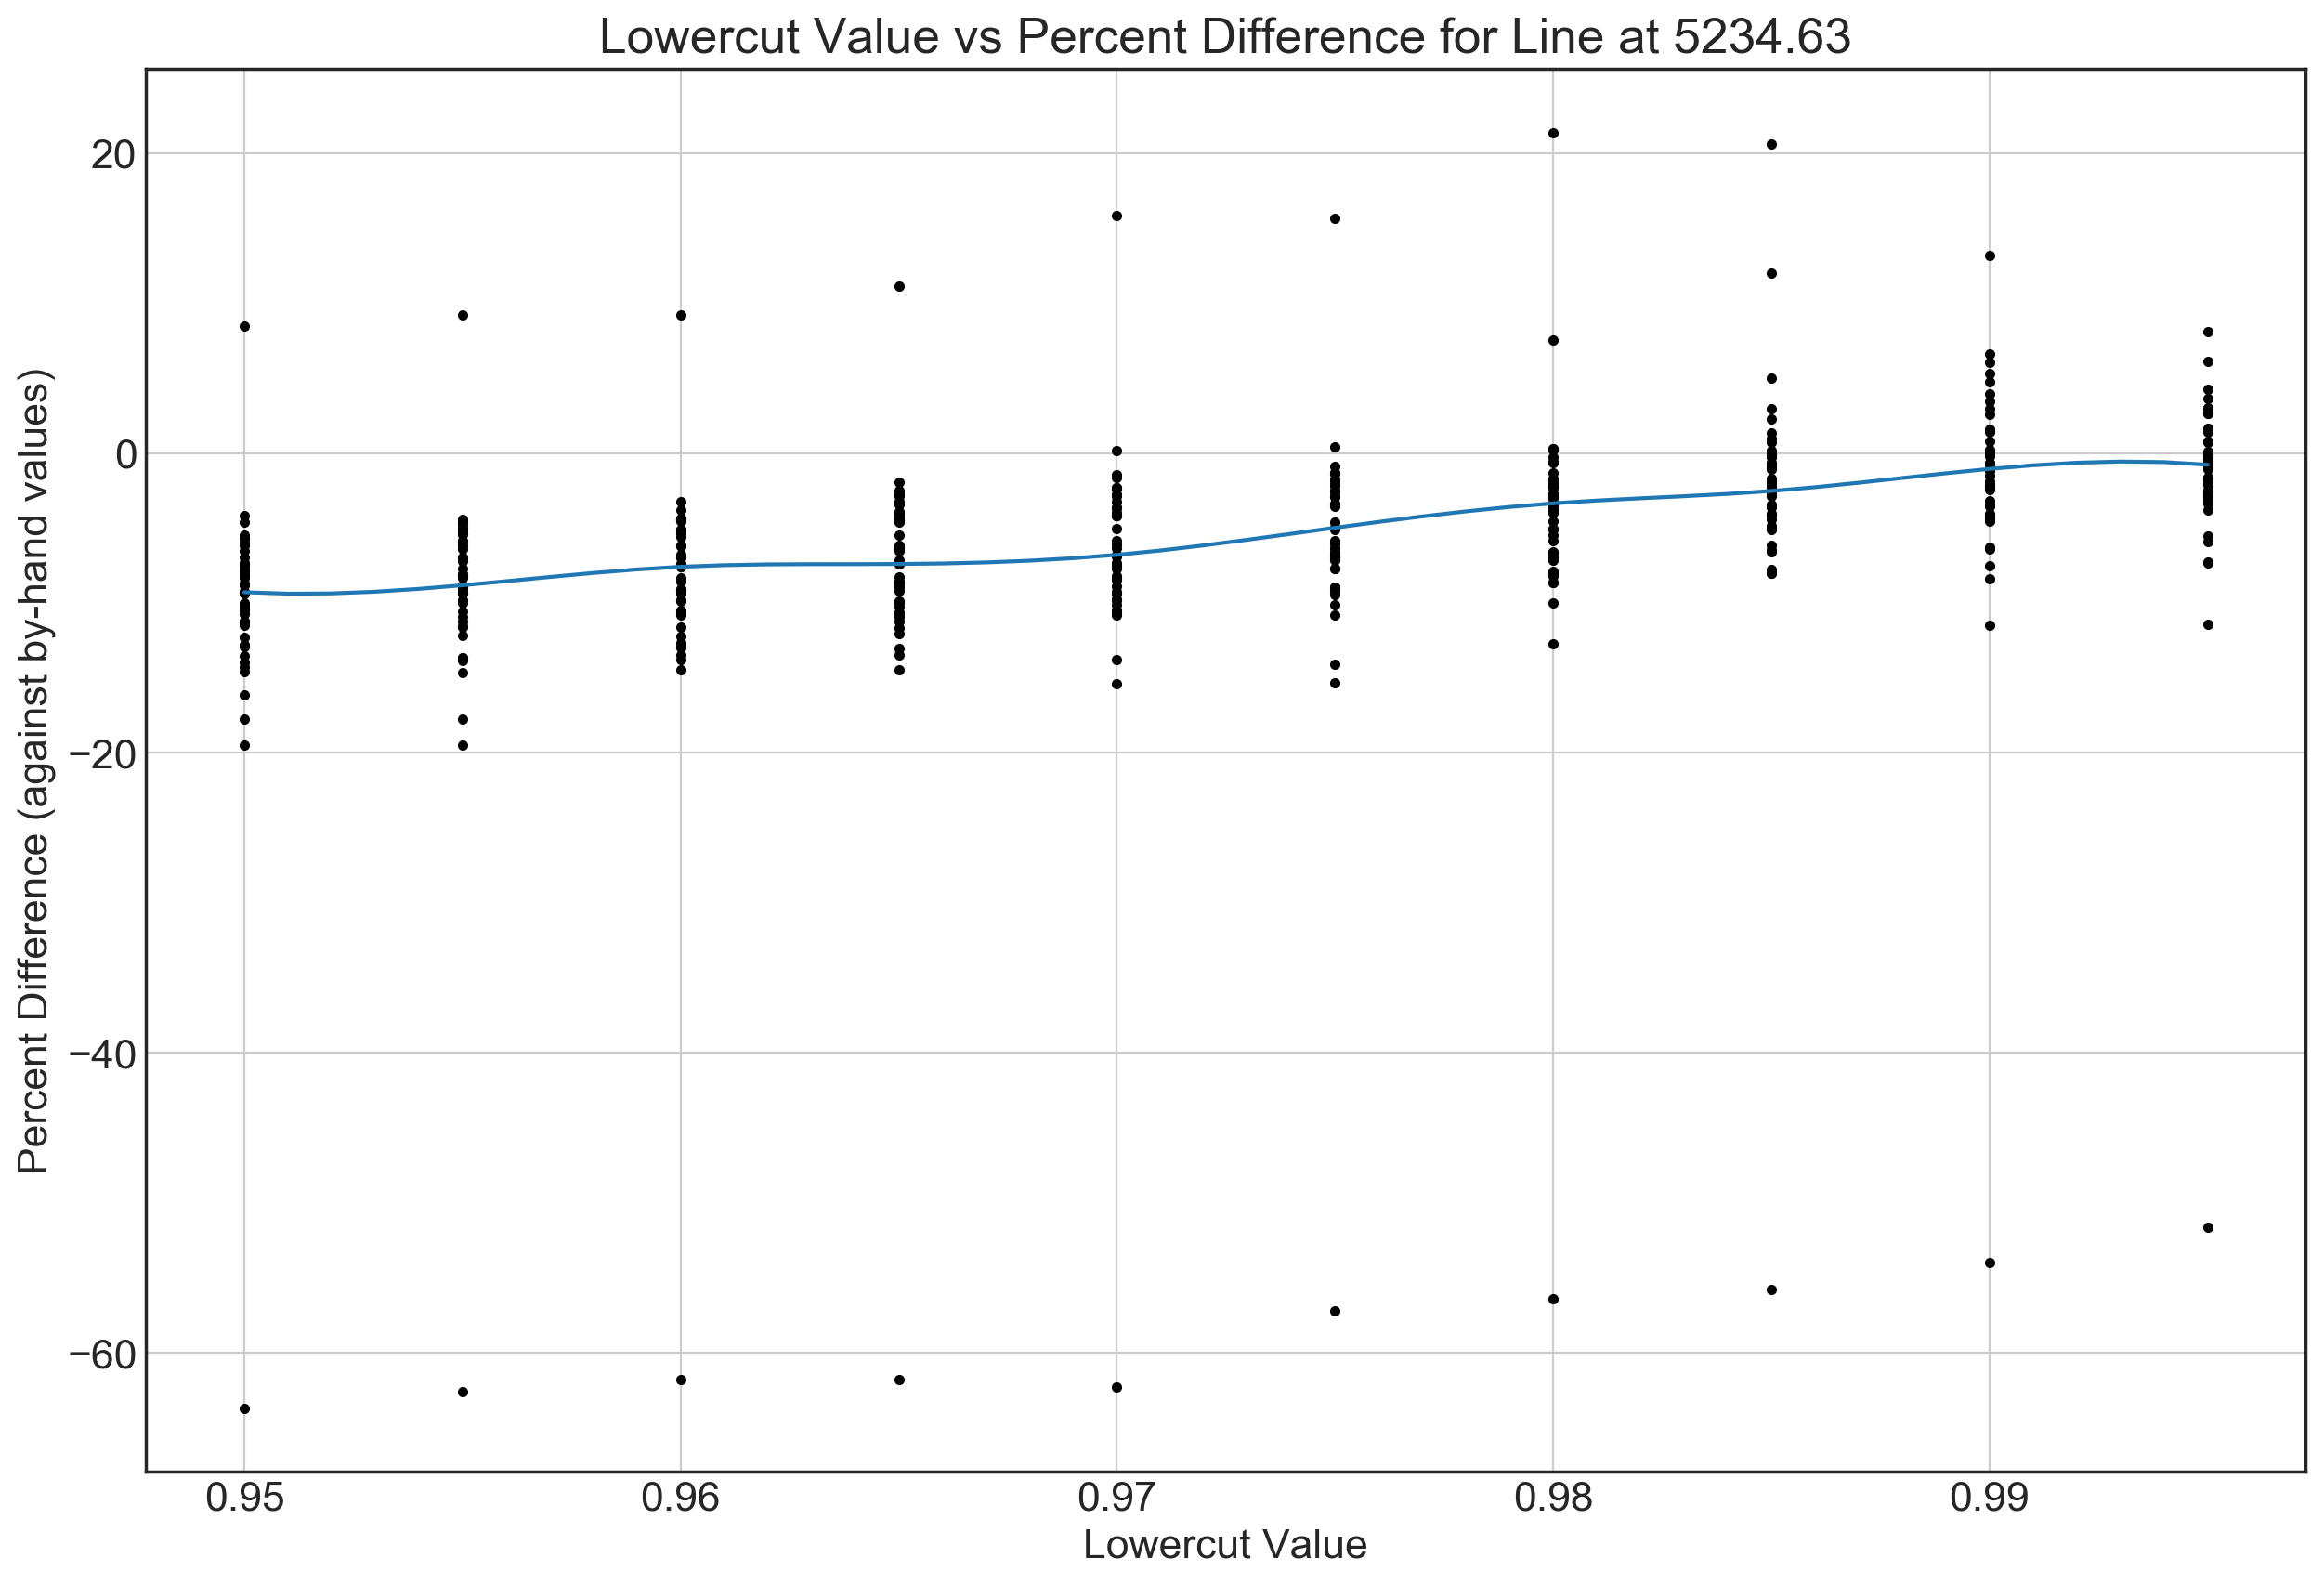

In [530]:
# Find optimal lowercut value
key_element = 2

with open(outputs[0]) as jsonfile:
    jsondata = json.load(jsonfile)
    key = list(jsondata.keys())[key_element]
    lowcuts = [cut for cut,ew in jsondata[key]]

plt.figure(figsize=(15,10),dpi=200)

text_out = False
pdiff_all = []
for i in range(len(outputs)):
    with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
        jsondata = json.load(jsonfile)
        handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
        hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
        key = list(jsondata.keys())[key_element]
        key = '5234.63'
        lowercut = [cut for cut,ew in jsondata[key]]
        ew_meas = [ew for cut,ew in jsondata[key]]
        
        label = disp_df['JSON File'][i].split('/')[-1].split('.')[0]
        if text_out:
            print("=========")
            print(label)
        if hand_dict[key] == 0:
            if text_out:
                print("SKIPPED STAR: By-Hand Value of 0")
            continue
        if len(lowercut) < 10:
            if text_out:
                print("SKIPPED STAR: Not enough lowercut values")
            continue
        ew_pdiff = ((np.array(ew_meas)-hand_dict[key])/hand_dict[key]) * 100
        #print(lowercut)
        lowercut_space = np.arange(0.95,0.995,0.0001)
        f = interpolate.UnivariateSpline(lowercut, ew_pdiff, s=0)
        lowcut_roots = f.roots()
        if len(lowcut_roots) == 0:
            if min(abs(ew_pdiff)) > 10:
                if text_out:
                    print("WARNING: No good value found, using closest")
            opt_lowcut = [lowercut[np.argmin(ew_pdiff)]]
        else:
            opt_lowcut = lowcut_roots

        if text_out:
            print("N Solutions: {}".format(len(lowcut_roots)))
            print("Optimal Lowercut Values: {}".format(opt_lowcut))

        
        pdiff_all.append(ew_pdiff)

        #plt.plot(lowercut_space, f(lowercut_space),'-',label = label)
        plt.plot(lowercut,ew_pdiff,'.',color='k')


pdiff_all = np.array(pdiff_all,dtype='object').T

#Sigma Clip
sigma = 5
pdiff_sclip = [np.ma.compressed(sigma_clip(np.array(pdiff_all[lowcuts.index(lc_val)]).astype(float),sigma=sigma)) 
               for lc_val in lowcuts]


avg_pdiffs = [np.median(pdiff_sclip[lowcuts.index(lc_val)]) for lc_val in lowcuts]
std_pdiffs = [np.std(pdiff_sclip[lowcuts.index(lc_val)]) for lc_val in lowcuts]

f = interpolate.UnivariateSpline(lowcuts,np.array(avg_pdiffs)-0,s=0)
f_unc = interpolate.UnivariateSpline(lowcuts,std_pdiffs, s=0)


opt_lowcut = f.roots()
"""
if len(lowcut_roots) == 0:
    if min(abs(avg_pdiffs)) > 10:
        
        print("WARNING: No roots found, using closest")
        opt_lowcut = [lowercut[np.argmin(avg_pdiffs)]]
    else:
        opt_lowcut = lowcut_roots
"""
print("Optimal Lowcut: ", opt_lowcut)
print("Standard Deviation of Percent Difference at Lowcut: ", f_unc(opt_lowcut))

lowcut_space = np.arange(0.95,0.995,0.001)
plt.plot(lowcut_space, f(lowcut_space),'-')
plt.title("Lowercut Value vs Percent Difference for Line at {}".format(key))
plt.xlabel("Lowercut Value")
plt.ylabel("Percent Difference (against by-hand values)")
plt.grid()
#plt.legend()

In [600]:
# Find optimal lowercut value
write_out = True

with open(outputs[0]) as jsonfile:
    jsondata = json.load(jsonfile)
    key = list(jsondata.keys())[2]
    lowcuts = [cut for cut,ew in jsondata[key]]
    line_list = list(jsondata.keys())
    line_list = np.array(sorted(np.array(line_list).astype(float))).astype(str)

if write_out:
    f_out = open("mean_lc_byline.txt","w")
solns_dev = []
closest_dev = []
closest_pdiffs = []

for line in line_list:
    f_out.write("=======\n")
    f_out.write("Line: {}\n".format(line))
    pdiff_all = []
    for i in range(len(outputs)):
        if outputs[i] == 'tame-1.1.0/ngc2204_3321red_oned_05jan14.json':
            continue
        with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
            jsondata = json.load(jsonfile)
            handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
            hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
            key = line
            lowercut = [cut for cut,ew in jsondata[key]]
            ew_meas = [ew for cut,ew in jsondata[key]]
            
            label = disp_df['JSON File'][i].split('/')[-1].split('.')[0]
            if hand_dict[key] == 0:
                continue
            if len(lowercut) < 10:
                continue
            ew_pdiff = ((np.array(ew_meas)-hand_dict[key])/hand_dict[key]) * 100
            #print(lowercut)
            lowercut_space = np.arange(0.95,0.995,0.0001)
            f = interpolate.UnivariateSpline(lowercut, ew_pdiff, s=0)
            lowcut_roots = f.roots()
            if len(lowcut_roots) == 0:
                opt_lowcut = [lowercut[np.argmin(ew_pdiff)]]
            else:
                opt_lowcut = lowcut_roots
    
            
            pdiff_all.append(ew_pdiff)
    

    pdiff_all = np.array(pdiff_all,dtype='object').T

    #Sigma Clip
    sigma = 5
    pdiff_sclip = [np.ma.compressed(sigma_clip(np.array(pdiff_all[lowcuts.index(lc_val)]).astype(float),sigma=sigma)) 
                   for lc_val in lowcuts]


    avg_pdiffs = [np.median(pdiff_sclip[lowcuts.index(lc_val)]) for lc_val in lowcuts]
    std_pdiffs = [np.std(pdiff_sclip[lowcuts.index(lc_val)]) for lc_val in lowcuts]

    f = interpolate.UnivariateSpline(lowcuts,np.array(avg_pdiffs)-0,s=0)
    f_unc = interpolate.UnivariateSpline(lowcuts,std_pdiffs, s=0)


    opt_lowcut = f.roots()
    
    if len(lowcut_roots) == 0: 
        if write_out:
            f_out.write("No roots found, using closest data point\n")

        opt_lowcut = [lowercut[np.argmin(abs(np.array(avg_pdiffs)))]]
        if min(abs(np.array(avg_pdiffs))) > 10:
            if write_out:
                f_out.write("WARNING: No lowcut value yields a good agreement (<10%)\n")
    else:
        opt_lowcut = lowcut_roots

    
    if write_out:
        f_out.write("Optimal Lowcut: {}\n".format(opt_lowcut))
        f_out.write("Standard Deviation of Percent Difference at Lowcut: {}\n".format(f_unc(opt_lowcut)))

    best_lowcut = opt_lowcut[np.argmin(f_unc(opt_lowcut))] #Best lowcut is solution with smallest spread
    best_dev = f_unc(opt_lowcut)[np.argmin(f_unc(opt_lowcut))]
    
    if len(lowcut_roots) == 0: # No True Solutions
        closest_dev.append(best_dev)
        closest_pdiffs.append(f(best_lowcut))
    else:
        solns_dev.append(best_dev)
        
    

    line_dev.append(best_dev)
if write_out:
    f_out.close()
    

Median and Standard Deviation for Lines with Solutions (N = 56):  6.00783483917 9.0763492287
Median and Standard Deviation for Lines without Solutions (N = 26):  7.22282957988 24.3125763648


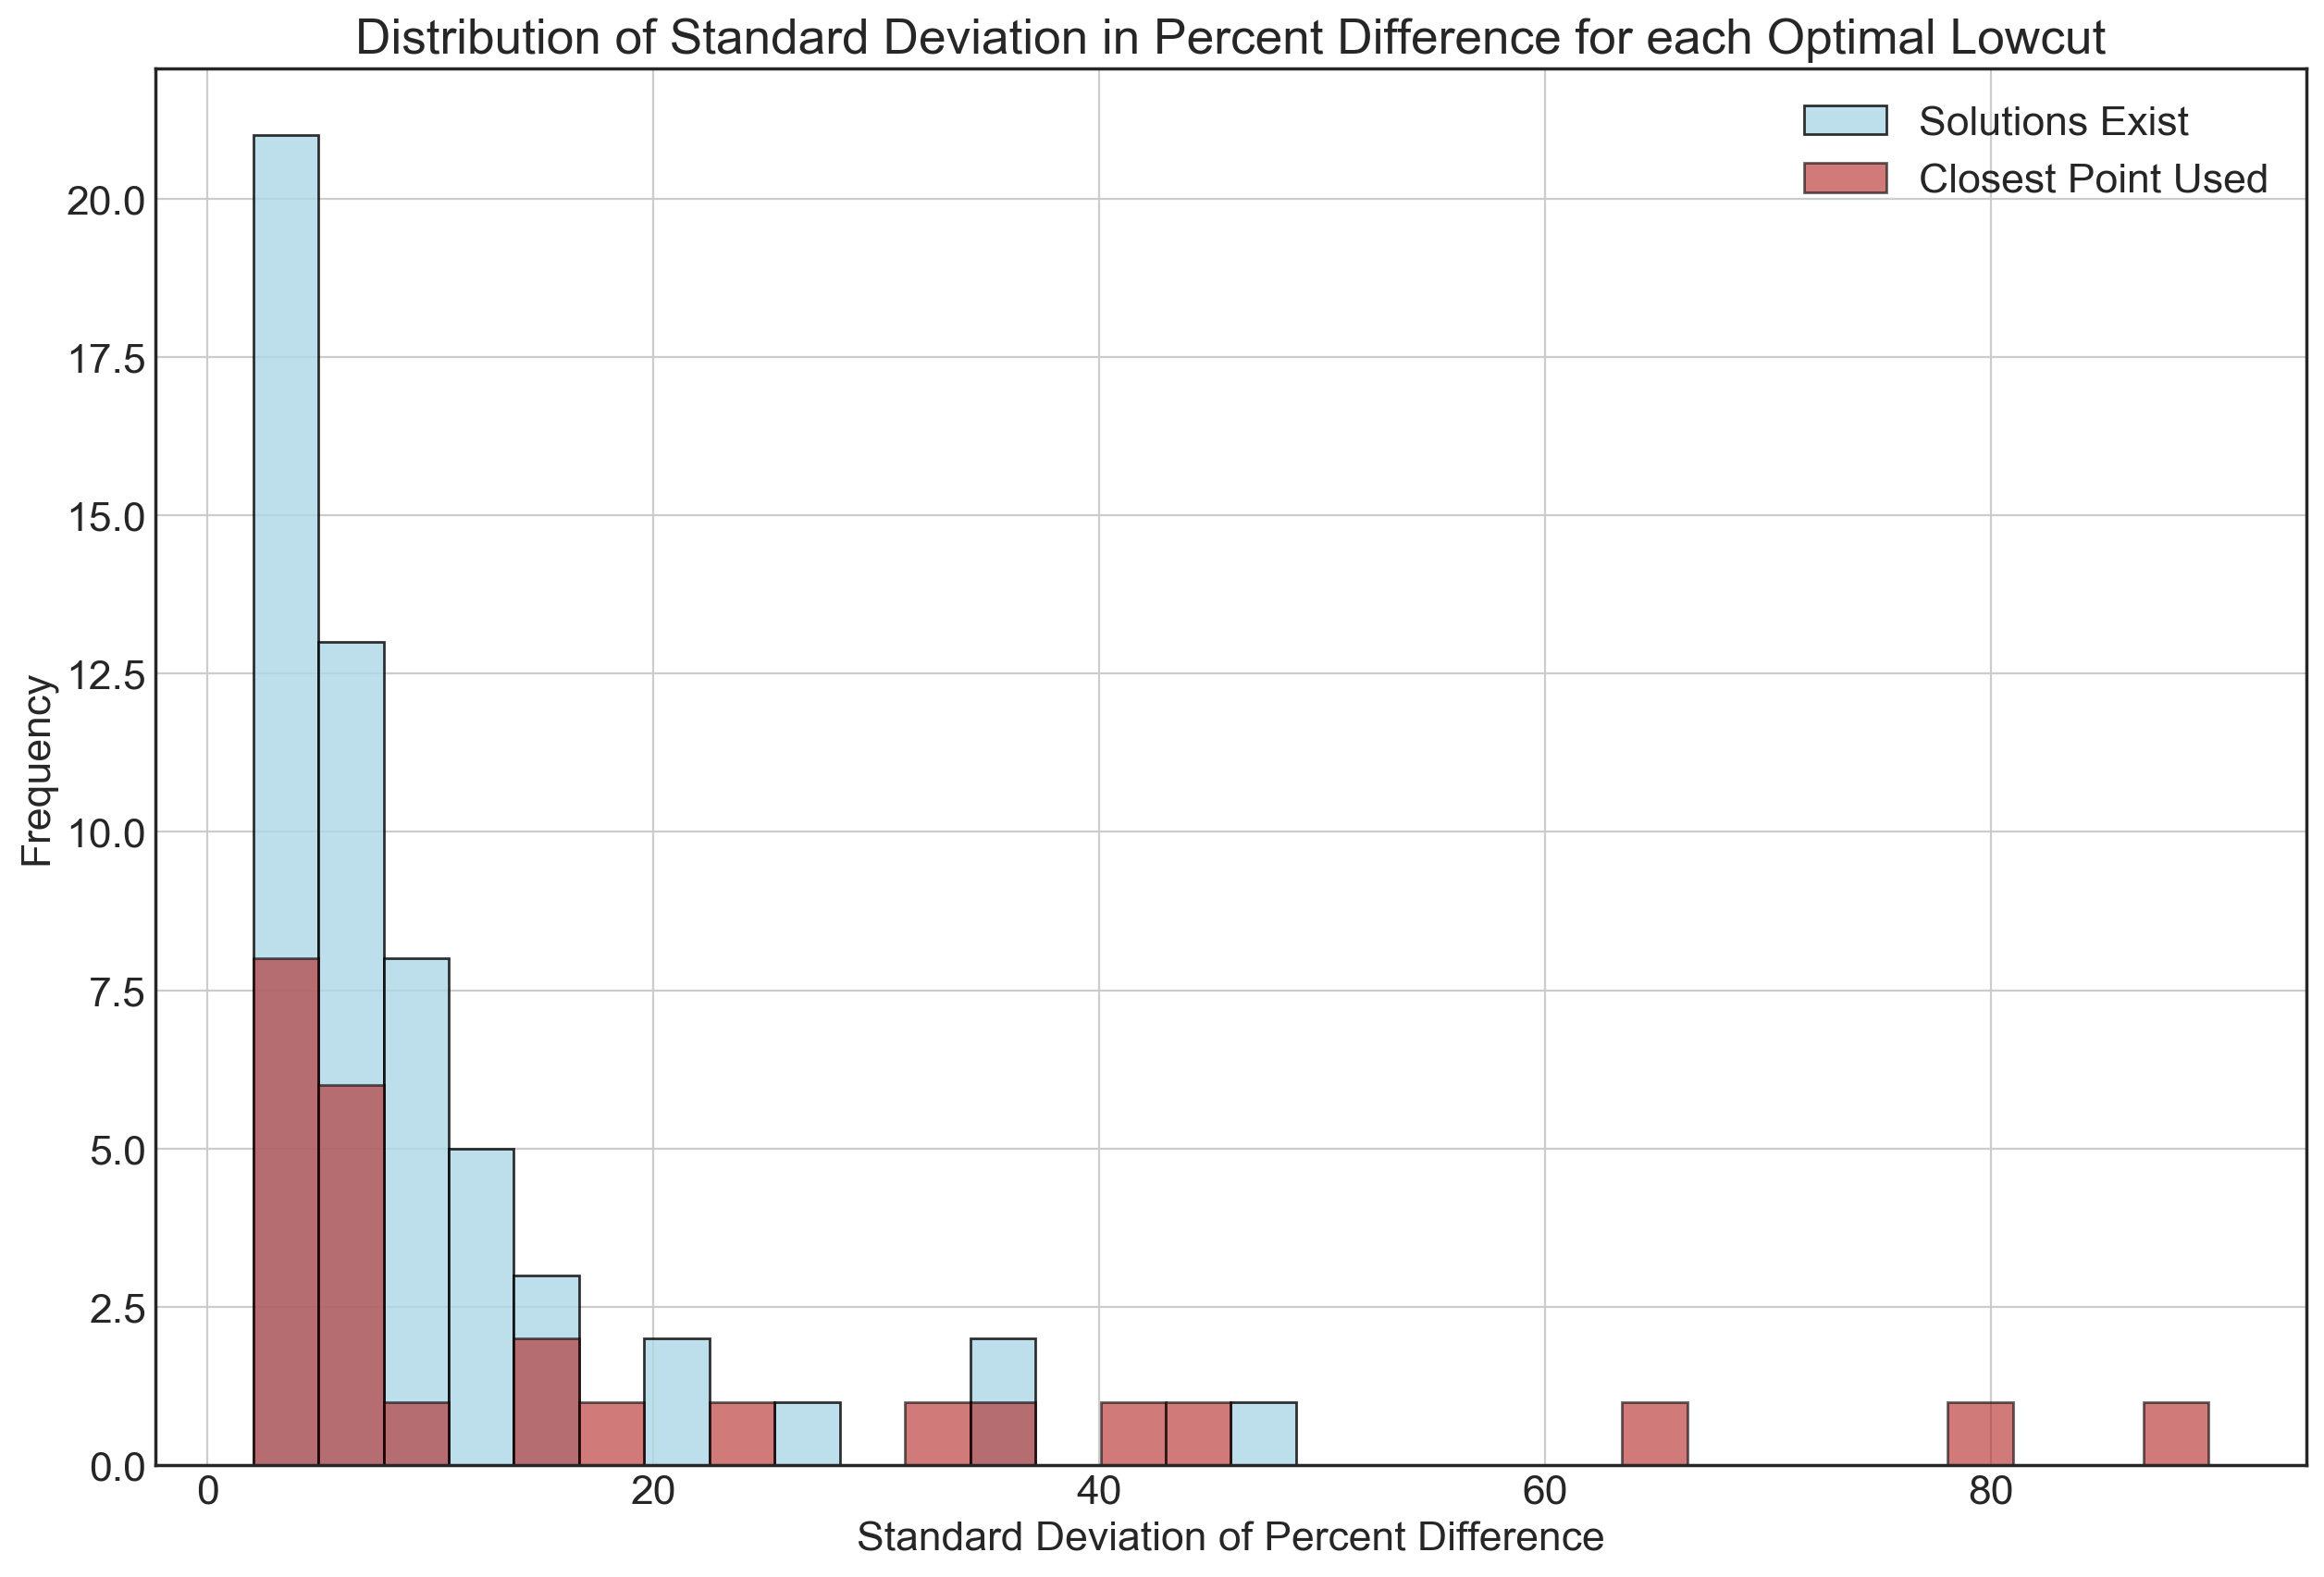

In [593]:
#Sigma Clip
sigma = 5

solns_sclip = np.ma.compressed(sigma_clip(solns_dev,sigma=sigma))
closest_sclip = np.ma.compressed(sigma_clip(closest_dev,sigma=sigma))




bins=np.histogram(np.hstack(line_sclip), bins=30)[1] #designate a consistent binsize across 
plt.figure(figsize=(15,10),dpi=200)
plt.hist(solns_sclip,histtype='bar',ec='black',alpha=0.8,color='lightblue',bins=bins,label='Solutions Exist')
plt.hist(closest_sclip,histtype='bar',ec='black',alpha=0.6,color='firebrick',bins=bins,label='Closest Point Used')
plt.ylabel("Frequency")
plt.xlabel("Standard Deviation of Percent Difference")
plt.title("Distribution of Standard Deviation in Percent Difference for each Optimal Lowcut")
plt.grid()
plt.legend()

print("Median and Standard Deviation for Lines with Solutions (N = {}): ".format(len(solns_sclip)),
      np.median(solns_sclip),np.std(solns_sclip))
print("Median and Standard Deviation for Lines without Solutions (N = {}): ".format(len(closest_sclip)),
      np.median(closest_sclip),np.std(closest_sclip))

Median and Standard Deviation for Lines without Solutions (N = 25):  -0.172860847018 2.12939012955


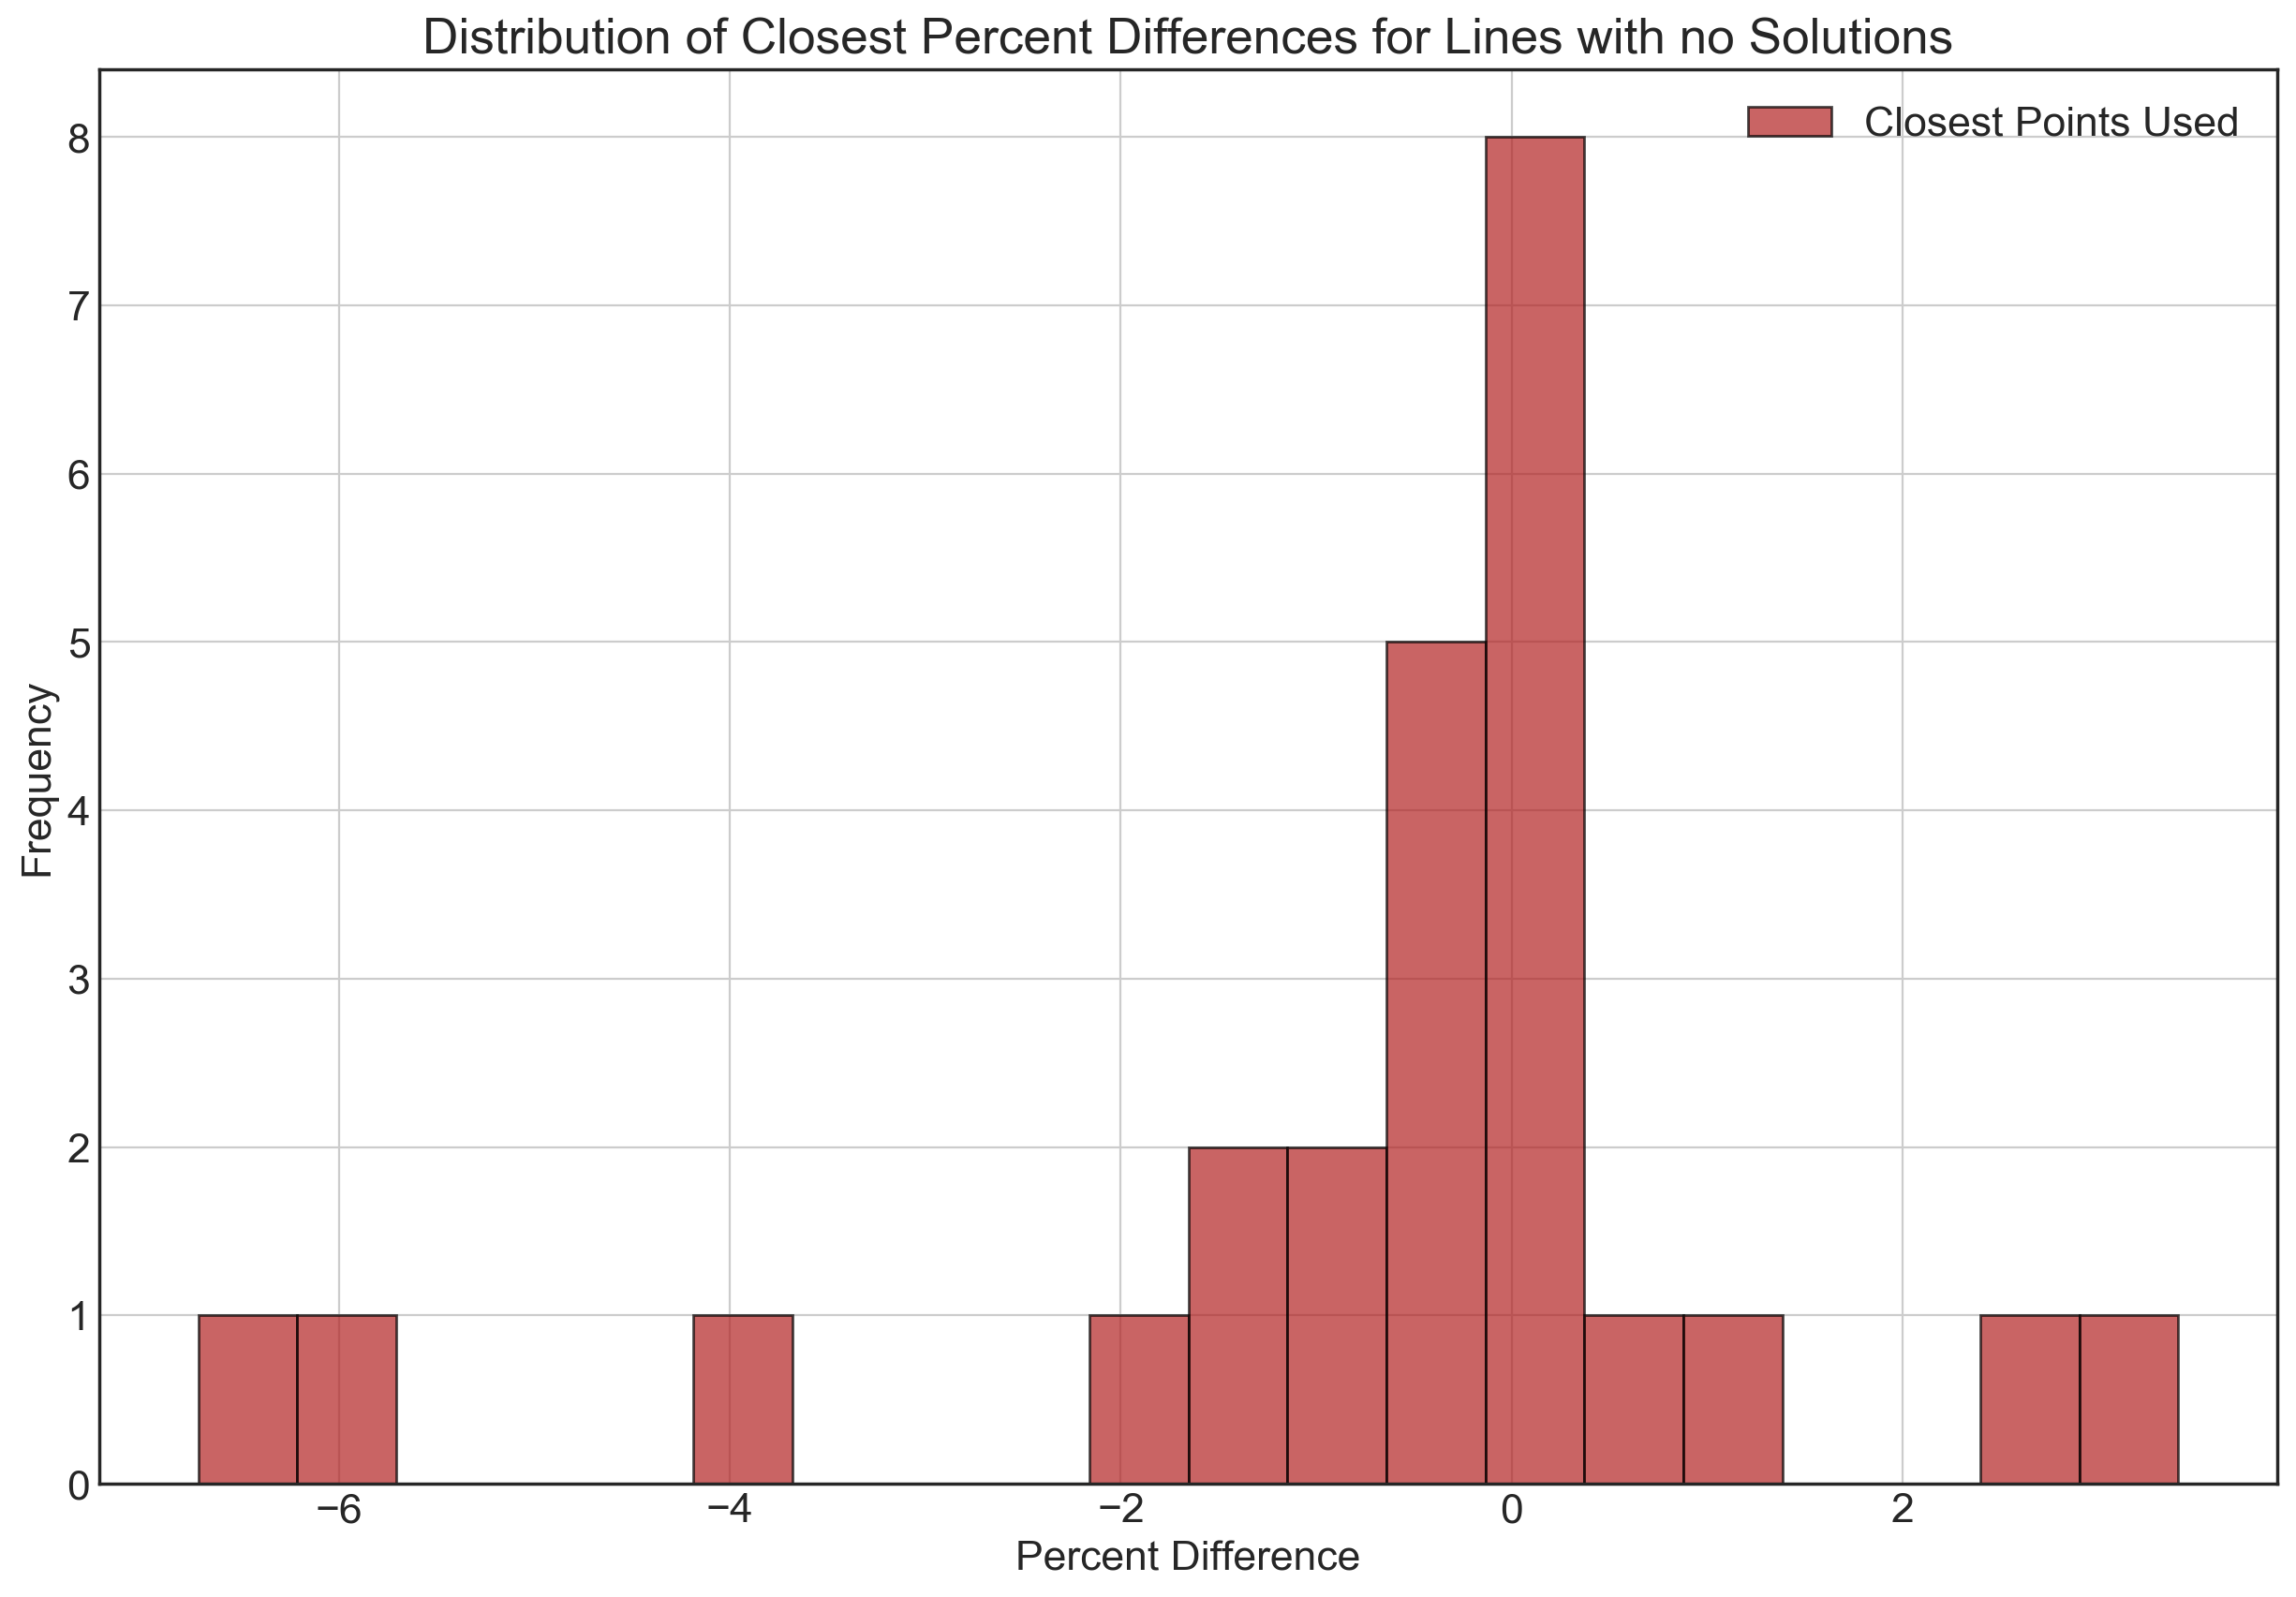

In [598]:
#Sigma Clip
sigma = 5

pdiff_sclip = np.ma.compressed(sigma_clip(closest_pdiffs,sigma=sigma))




bins=np.histogram(np.hstack(pdiff_sclip), bins=20)[1] #designate a consistent binsize across 
plt.figure(figsize=(15,10),dpi=200)
plt.hist(pdiff_sclip,histtype='bar',ec='black',alpha=0.7,color='firebrick',bins=bins,label='Closest Points Used')
plt.ylabel("Frequency")
plt.xlabel("Percent Difference")
plt.title("Distribution of Closest Percent Differences for Lines with no Solutions")
plt.grid()
plt.legend()

print("Median and Standard Deviation for Lines without Solutions (N = {}): ".format(len(pdiff_sclip)),
      np.median(pdiff_sclip),np.std(pdiff_sclip))
